In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# model preprocessors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# problem
### flight price prediction

KeyError: "['Unnamed: 0', 'flight'] not found in axis"


## Dataset cloumns
The dataset has columns such as Unnamed: 0, airline, flight, source_city, 
departure_time, stops, arrival_time, destination_city,
class, duration, days_left, and price

## flight price prediction

In [7]:
df=pd.read_csv("data/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
# Only drop columns if they exist
columns_to_drop = ['Unnamed: 0', 'flight']

# Use list comprehension to keep only existing columns
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df.flight.max()


'UK-996'

In [10]:
df.describe()


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [11]:
df.departure_time.max()

'Night'

In [12]:
df.price.max()

123071

In [13]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [15]:
df.source_city.max()

'Mumbai'

In [19]:
import pandas as pd

# Assuming df is your DataFrame and you've already read your data

# Convert the specified columns to category first (if needed)
df['airline'] = df['airline'].astype('category')
df['flight'] = df['flight'].astype('category')
df['source_city'] = df['source_city'].astype('category')
df['departure_time'] = df['departure_time'].astype('category')
df['stops'] = df['stops'].astype('category')
df['arrival_time'] = df['arrival_time'].astype('category')
df['destination_city'] = df['destination_city'].astype('category')
df['class'] = df['class'].astype('category')

# Now, convert the categories to integer codes
df['airline'] = df['airline'].cat.codes
df['flight'] = df['flight'].cat.codes
df['source_city'] = df['source_city'].cat.codes
df['departure_time'] = df['departure_time'].cat.codes
df['stops'] = df['stops'].cat.codes
df['arrival_time'] = df['arrival_time'].cat.codes
df['destination_city'] = df['destination_city'].cat.codes
df['class'] = df['class'].cat.codes

# Ensure conversion to int (if they are already in integer format, this step is not necessary)
df['airline'] = df['airline'].astype(int)
df['flight'] = df['flight'].astype(int)
df['source_city'] = df['source_city'].astype(int)
df['departure_time'] = df['departure_time'].astype(int)
df['stops'] = df['stops'].astype(int)
df['arrival_time'] = df['arrival_time'].astype(int)
df['destination_city'] = df['destination_city'].astype(int)
df['class'] = df['class'].astype(int)

# Check data types
print(df.dtypes)


Unnamed: 0            int64
airline               int32
flight                int32
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object


 ## Bar Plot: Average price by airline.
Line Plot: Number of days left until departure versus price.
Scatter Plot: Duration versus price, possibly colored by the number of stops.
Histogram: Distribution of flight prices.

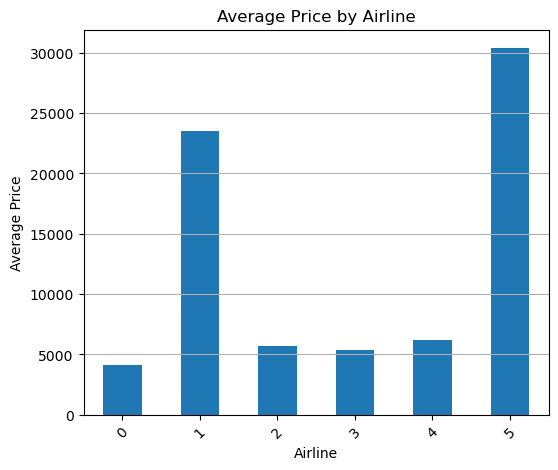

In [27]:
 # Grouping by 'airline' and calculating the average 'price'
avg_price_by_airline = df.groupby('airline')['price'].mean()

# Plotting the bar plot
plt.figure(figsize=(6, 5))
avg_price_by_airline.plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

df['duration']: Represents the duration of the flight.

df['price']: Represents the price of the flight.

c=df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2}): The color of the points, mapped according to the number of stops.

cmap='viridis': The color map used for the plot.

alpha=0.6: The transparency of the points.

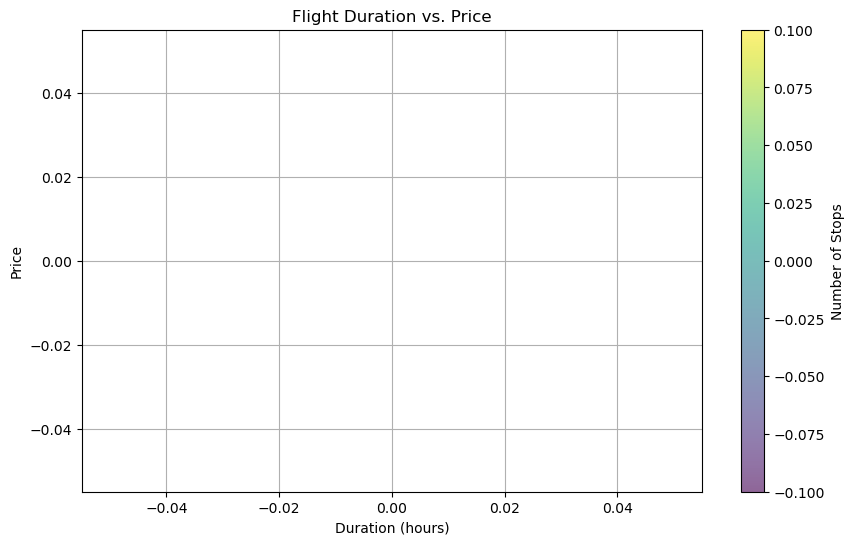

In [30]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['price'], c=df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2}), cmap='viridis', alpha=0.6)
plt.colorbar(label='Number of Stops')
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

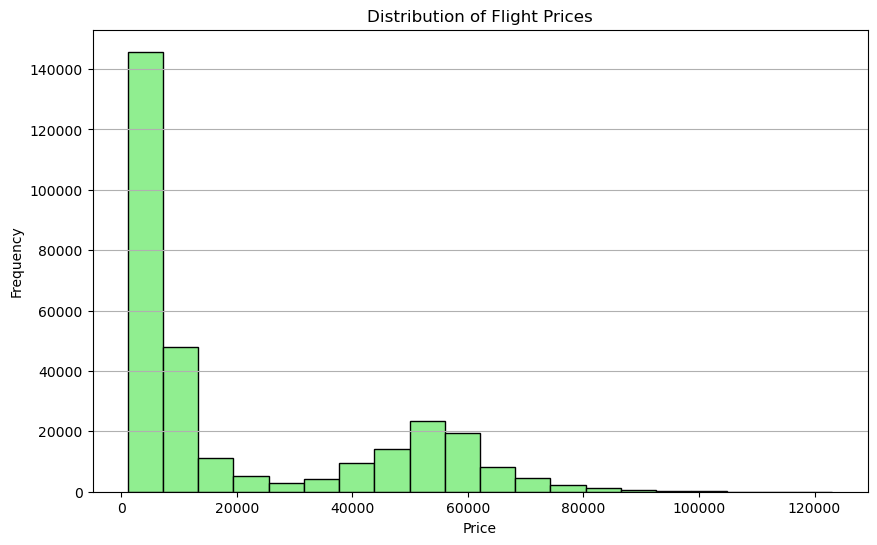

In [31]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

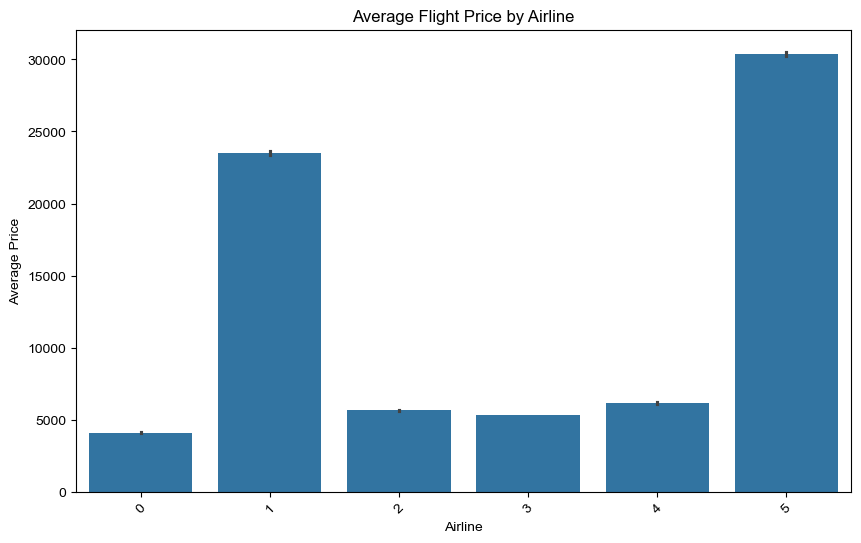

In [32]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='airline', y='price', estimator='mean')
sns.set_style("dark")

plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

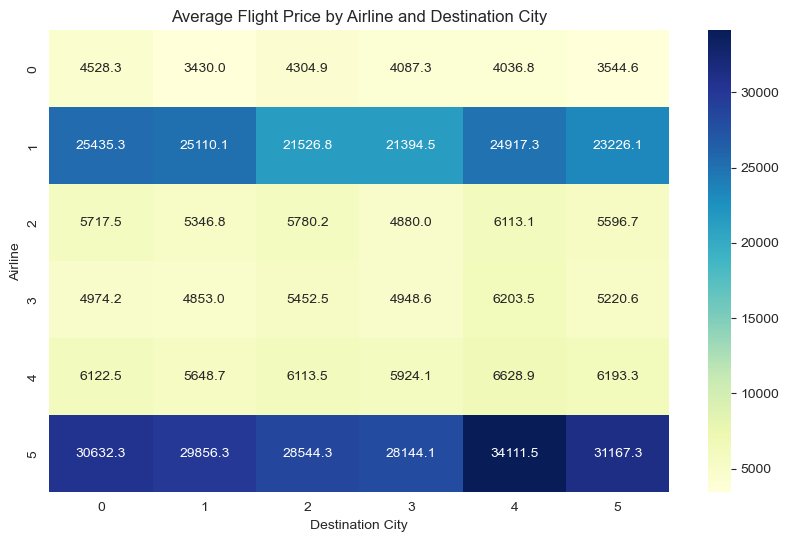

In [33]:
# Pivot the data for the heatmap
pivot_table = df.pivot_table(values='price', index='airline', columns='destination_city', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Flight Price by Airline and Destination City')
plt.xlabel('Destination City')
plt.ylabel('Airline')
plt.show()

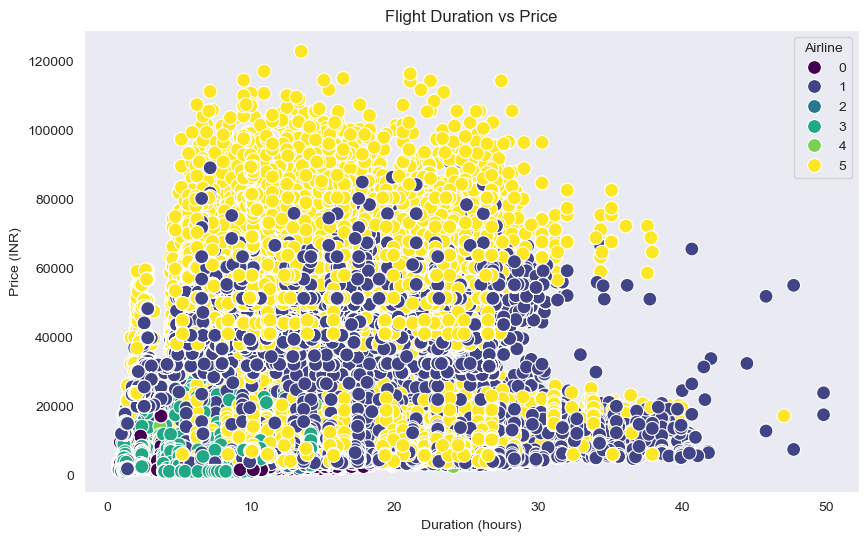

In [36]:
# Create the scatter plot with color coding
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='airline', palette='viridis', s=100)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price (INR)')
plt.legend(title='Airline')
plt.show()

## Density plot
Univariate Density Plot:
The sns.kdeplot function with x='duration' creates a density plot for flight durations. fill=True fills the area under the curve, and color specifies the color.

Bivariate Density Plot:
sns.kdeplot with both x and y arguments shows the density of points in a 2D space. The cmap parameter specifies the color map used to represent density levels.

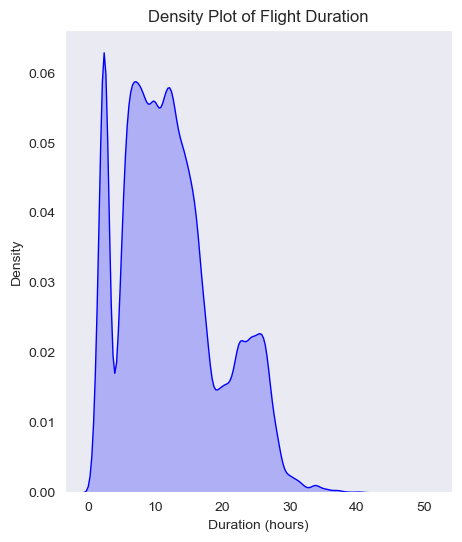

In [38]:
# Create the univariate density plot
plt.figure(figsize=(5, 6))
sns.kdeplot(data=df, x='duration', fill=True, color='blue')
plt.title('Density Plot of Flight Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Density')
plt.show()

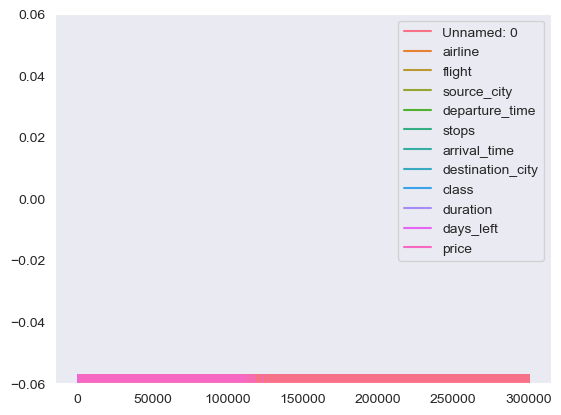

In [39]:
sns.rugplot(df)
plt.show()

# model

In [41]:
x = df.drop("price", axis=1)
x

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,4,1408,2,2,2,5,5,1,2.17,1
1,1,4,1387,2,1,2,4,5,1,2.33,1
2,2,0,1213,2,1,2,1,5,1,2.17,1
3,3,5,1559,2,4,2,0,5,1,2.25,1
4,4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1477,1,4,0,2,3,0,10.08,49
300149,300149,5,1481,1,0,0,5,3,0,10.42,49
300150,300150,5,1486,1,1,0,5,3,0,13.83,49
300151,300151,5,1483,1,1,0,2,3,0,10.00,49


In [42]:
y=df['price']
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [51]:
rg = LinearRegression()

In [53]:
rg.fit(xtrain,ytrain)

LinearRegression()

In [55]:
rg.score(xtest,ytest)

0.9051291807275819

In [57]:
ytest

36639      7426
164093     5420
41511      4729
238617    17548
112305     5322
          ...  
43015      7407
294626    44144
245875    50361
231834    54608
191726     5037
Name: price, Length: 60031, dtype: int64

In [59]:
xtest

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
36639,36639,0,1137,2,4,0,2,1,1,7.83,12
164093,164093,2,1054,3,1,0,2,5,1,10.67,39
41511,41511,3,54,2,0,0,5,1,1,8.25,40
238617,238617,1,788,5,5,2,5,3,0,1.33,11
112305,112305,5,1506,0,1,0,5,3,1,14.25,24
...,...,...,...,...,...,...,...,...,...,...,...
43015,43015,3,472,2,5,0,4,1,1,10.83,49
294626,294626,5,1477,1,4,0,5,0,0,11.17,25
245875,245875,5,1511,0,2,0,4,2,0,13.58,15
231834,231834,5,1547,5,0,0,2,0,0,6.42,23


In [61]:
ypred = rg.predict(xtest)

In [63]:
ypred

array([ 6054.80591933,  5312.32500417,  5194.33917454, ...,
       55670.59367441, 53820.91617153,  9517.980576  ])

In [65]:
rg.coef_

array([ 2.29394298e-03,  9.10118889e+02,  3.15540756e-01,  1.12792678e+02,
        3.80433066e+01, -3.26888067e+03,  1.87875385e+02,  1.24497718e+02,
       -4.41582208e+04,  8.83097415e+01, -1.32457567e+02])

In [67]:
rg.intercept_

49790.227545869944

In [71]:
mse = mean_squared_error(ytest, ypred)
mse

48838332.40975166